# Queda de Velocidade ao passar por anteparo de vidro de 1/8'

## Retirado do vídeo: https://www.youtube.com/watch?v=PD1vkhFO4Dg.

| Glasses | Velocity MPH | Velocity m/s |
|---------|--------------|--------------|
| 0       | 806          | 360.31       |
| 1       | 690          | 308.46       |
| 2       | 590          | 263.75       |
| 3       | 375          | 167.64       |
| 4       | 163          | 72.87        |
| 5       | 120          | 53.64        |
| 6       | 50           | 22.35        |

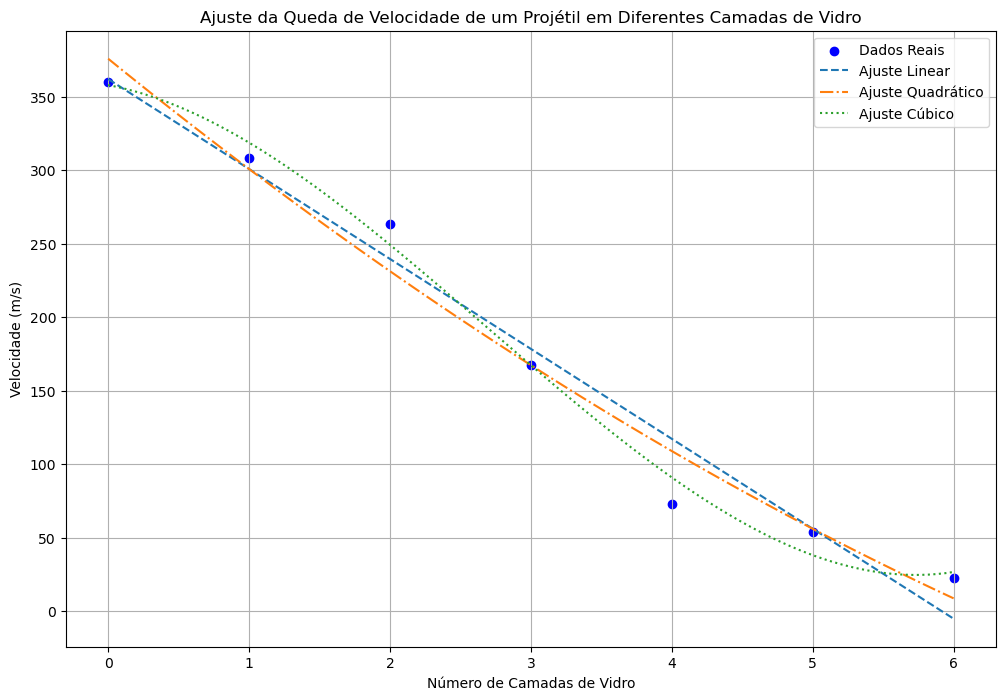

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Dados fornecidos
camadas_vidro = np.array([0, 1, 2, 3, 4, 5, 6])
velocidade_m_s = np.array([360.31, 308.46, 263.75, 167.64, 72.87, 53.64, 22.35])

# Funções para ajuste: linear, quadrático, cúbico e exponencial
def ajuste_linear(x, a, b):
    return a * x + b

def ajuste_quadratico(x, a, b, c):
    return a * x**2 + b * x + c

def ajuste_cubico(x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d

def ajuste_exponencial(x, a, b, c):
    return a * np.exp(b * x) + c

# Realizando os ajustes
params_linear, _ = curve_fit(ajuste_linear, camadas_vidro, velocidade_m_s)
params_quadratico, _ = curve_fit(ajuste_quadratico, camadas_vidro, velocidade_m_s)
params_cubico, _ = curve_fit(ajuste_cubico, camadas_vidro, velocidade_m_s)

# Valores ajustados
x_valores = np.linspace(0, 6, 100)
y_linear = ajuste_linear(x_valores, *params_linear)
y_quadratico = ajuste_quadratico(x_valores, *params_quadratico)
y_cubico = ajuste_cubico(x_valores, *params_cubico)

# Plotando os dados e os ajustes
plt.figure(figsize=(12, 8))
plt.scatter(camadas_vidro, velocidade_m_s, color='blue', label='Dados Reais')
plt.plot(x_valores, y_linear, label='Ajuste Linear', linestyle='--')
plt.plot(x_valores, y_quadratico, label='Ajuste Quadrático', linestyle='-.')
plt.plot(x_valores, y_cubico, label='Ajuste Cúbico', linestyle=':')

plt.xlabel('Número de Camadas de Vidro')
plt.ylabel('Velocidade (m/s)')
plt.title('Ajuste da Queda de Velocidade de um Projétil em Diferentes Camadas de Vidro')
plt.legend()
plt.grid(True)
plt.show()

In [4]:
# Coeficientes dos ajustes
a_linear, b_linear = params_linear
a_quad, b_quad, c_quad = params_quadratico
a_cub, b_cub, c_cub, d_cub = params_cubico

# Criando as equações em formato de string
equacao_linear = f"Linear: y = {a_linear:.2f}x + {b_linear:.2f}"
equacao_quadratica = f"Quadrático: y = {a_quad:.2f}x² + {b_quad:.2f}x + {c_quad:.2f}"
equacao_cubica = f"Cúbico: y = {a_cub:.2f}x³ + {b_cub:.2f}x² + {c_cub:.2f}x + {d_cub:.2f}"

equacao_linear, equacao_quadratica, equacao_cubica

('Linear: y = -61.23x + 362.12',
 'Quadrático: y = 2.77x² + -77.86x + 375.98',
 'Cúbico: y = 2.99x³ + -24.16x² + -18.01x + 358.02')

#### Ajuste Linear:
y = -61.23x + 362.12

#### Ajuste Quadrático:
y = 2.77x² + -77.86x + 375.98
> A função indica uma mudança de taxa na diminuição da velocidade conforme o número de camadas de vidro aumenta, tendendo a decrescer, o que não faz sentido físico.

#### Ajuste Cúbico:
y = 2.99x³ + -24.16x² + -18.01x + 358.02
> A função indica, também, que quanto maior o número de camadas, o freio por camada diminuirá ainda mais. Não faz sentido

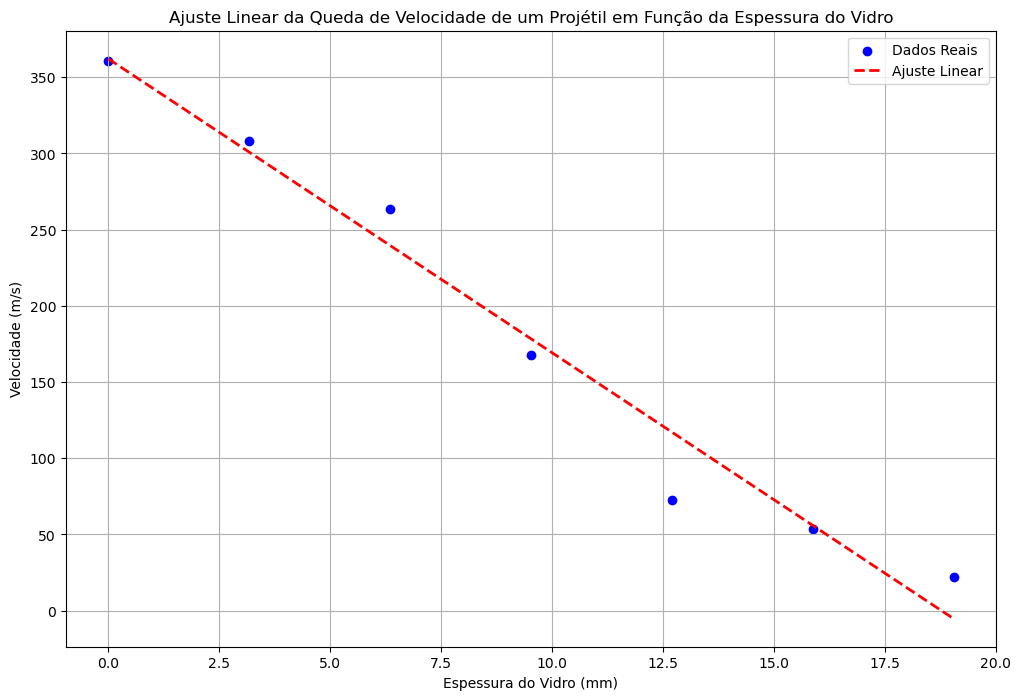

In [5]:
# Convertendo o número de camadas para espessura em milímetros
espessura_vidro_mm = camadas_vidro * 3.175

# Redefinindo os valores de x para a nova escala (espessura em mm)
x_valores_mm = np.linspace(0, 3.175 * 6, 100)

# Ajustando a equação linear para a nova escala
# A inclinação da linha (coeficiente a) deve ser ajustada pela conversão de camadas para milímetros
a_linear_mm = a_linear / 3.175
y_linear_mm = a_linear_mm * x_valores_mm + b_linear

# Plotando os dados e o ajuste linear na nova escala
plt.figure(figsize=(12, 8))
plt.scatter(espessura_vidro_mm, velocidade_m_s, color='blue', label='Dados Reais')
plt.plot(x_valores_mm, y_linear_mm, label='Ajuste Linear', color='red', linestyle='--', linewidth=2)
plt.xlabel('Espessura do Vidro (mm)')
plt.ylabel('Velocidade (m/s)')
plt.title('Ajuste Linear da Queda de Velocidade de um Projétil em Função da Espessura do Vidro')
plt.legend()
plt.grid(True)
plt.show()


### Nomeando as Variáveis:

Inicialmente, temos a equação linear da forma:

$$ v = -61.23x + v_0 $$

mas, façamos  o coeficiente a: (-61.23 / 3.175), pois precisamos do valor em mm.

$$ v = -19.29x + v_0 $$

onde:
- $v$ é a velocidade final do projétil (em m/s),
- $x$ é a espessura total do vidro (em mm),
- $v_0$ é a velocidade inicial do projétil (em m/s) (362.12 no exemplo).

### Isolando $v_0$:

Para expressar a velocidade inicial $v_0$ em função da velocidade final $v$ e da espessura do vidro $x$, rearranjamos a equação para:

$$ v_0 = v + 61.23x $$

Com esta equação, podemos calcular a velocidade inicial do projétil, dada a sua velocidade final após atravessar uma determinada espessura de vidro.
